In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as plt

In [4]:
%matplotlib inline

In [5]:
loans=pd.read_csv("F:\\machine learning\\train_anlytics_vidhya.csv")

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


LoanAmount has (614 – 592) 22 missing values.
Loan_Amount_Term has (614 – 600) 14 missing values.
Credit_History has (614 – 564) 50 missing values.
We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome


In [8]:
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
loans['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

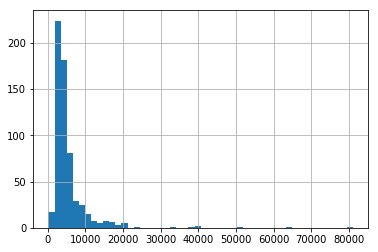

In [10]:
loans['ApplicantIncome'].hist(bins=50)

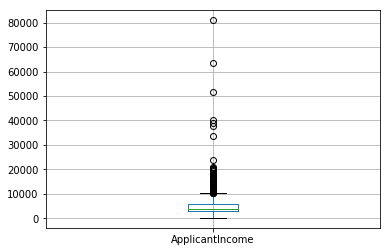

In [11]:
loans.boxplot(column='ApplicantIncome')

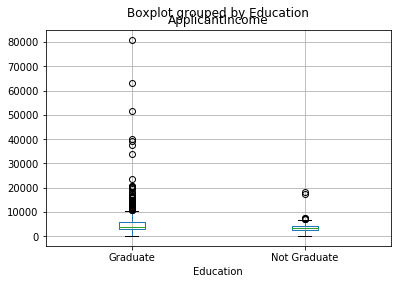

In [12]:
loans.boxplot(column='ApplicantIncome',by='Education')

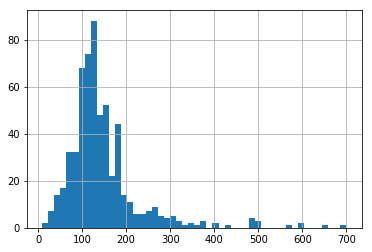

In [13]:
loans['LoanAmount'].hist(bins=50)

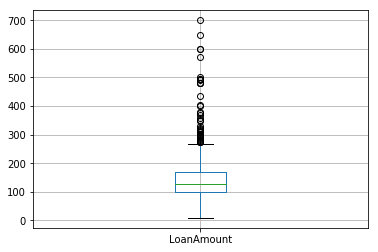

In [14]:
loans.boxplot(column='LoanAmount')

In [15]:
temp1=loans['Credit_History'].value_counts(ascending=True)

In [16]:
temp2=loans.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

In [17]:
print('Freqency Table for Credit History:')
print(temp1)

Freqency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [18]:
print('probability of getting loan foe each credit history class:')
print(temp2)      

probability of getting loan foe each credit history class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Prabability of getting loan by credit history')

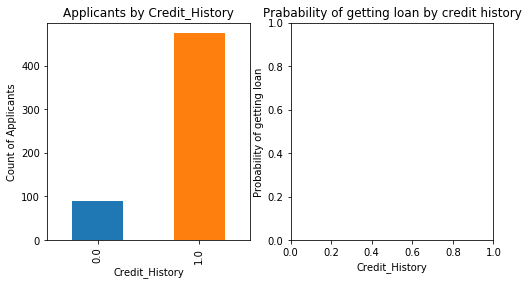

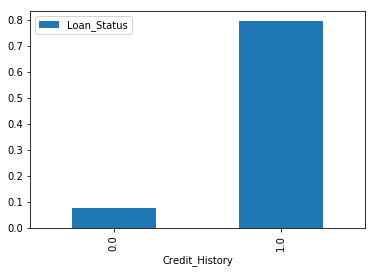

In [20]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')
ax2=fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Prabability of getting loan by credit history")

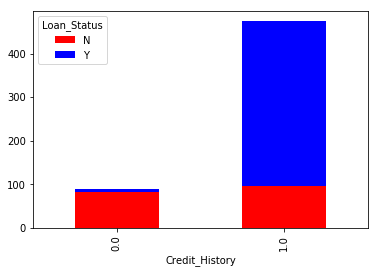

In [22]:
temp3=pd.crosstab(loans['Credit_History'],loans['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

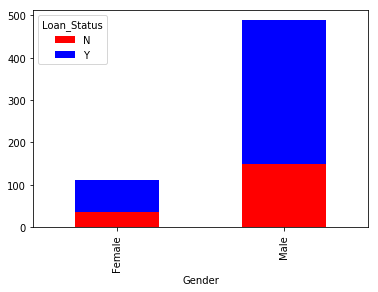

In [23]:
temp3=pd.crosstab(loans['Gender'],loans['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

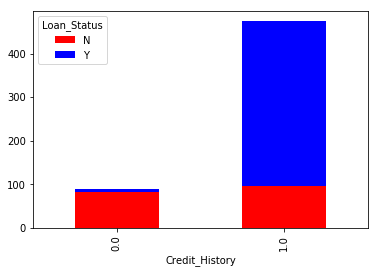

In [26]:
temp3=pd.crosstab(loans['Credit_History'],loans['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

In [27]:
loans.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
loans['LoanAmount'].fillna(loans['LoanAmount'].mean(),inplace=True)

In [32]:
loans['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [33]:
loans['Self_Employed'].fillna('No',inplace=True)

In [50]:
table=loans.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
    loans['LoanAmount'].fillna(loans[loans['LoanAmount'].isnull()].apply(fage,axis=1),inplace=True)                     

In [53]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


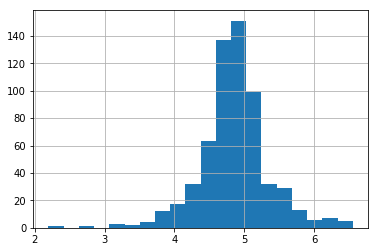

In [54]:
loans['LoanAmount_log']=np.log(loans['LoanAmount'])
loans['LoanAmount_log'].hist(bins=20)

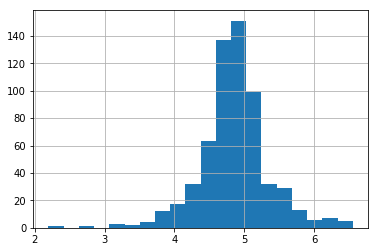

In [59]:
loans['TotalIncome']=loans['ApplicantIncome']+loans['CoapplicantIncome']
loans['TotalIncome_log']=np.log(loans['TotalIncome'])
loans['LoanAmount_log'].hist(bins=20)

In [60]:
loans['Gender'].fillna(loans['Gender'].mode()[0], inplace=True)
loans['Married'].fillna(loans['Married'].mode()[0], inplace=True)
loans['Dependents'].fillna(loans['Dependents'].mode()[0], inplace=True)
loans['Loan_Amount_Term'].fillna(loans['Loan_Amount_Term'].mode()[0], inplace=True)
loans['Credit_History'].fillna(loans['Credit_History'].mode()[0], inplace=True)


In [62]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    loans[i] = le.fit_transform(loans[i])
loans.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [76]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold 
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


def classification_model(model, data, predictors, outcome):
  
  model.fit(data[predictors],data[outcome])
  
  
  predictions = model.predict(data[predictors])
  
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    
    train_target = data[outcome].iloc[train]
    
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  model.fit(data[predictors],data[outcome])

In [77]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, loans,predictor_var,outcome_var)

Accuracy : 80.945%


G:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [79]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, loans,predictor_var,outcome_var)


Accuracy : 80.945%


G:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [81]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, loans,predictor_var,outcome_var)


Accuracy : 80.945%


TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [83]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, loans,predictor_var,outcome_var)


Accuracy : 89.414%


TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [85]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, loans,predictor_var,outcome_var)

Accuracy : 100.000%


TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [86]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)


TotalIncome_log     0.270902
Credit_History      0.261154
LoanAmount_log      0.225037
Dependents          0.054883
Property_Area       0.050266
Loan_Amount_Term    0.045175
Married             0.026537
Education           0.025282
Self_Employed       0.020792
Gender              0.019972
dtype: float64


In [88]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, loans,predictor_var,outcome_var)


Accuracy : 82.410%


TypeError: __init__() got an unexpected keyword argument 'n_folds'